# **My favorate celebrity face Recognition and about them**

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 71kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=329eb835f3c08f03369f550ebdbe410014ccbb87deaf5dcfb5aba5301d235155
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

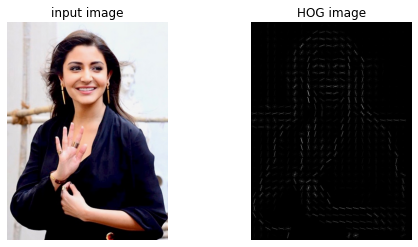

In [101]:
image=cv2.imread("/Anushka.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)
fig,(ax1,ax2)=plt.subplots(1 , 2 ,figsize=(8,4),sharex=True,sharey=True)

ax1.axis("off")
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title("input image")

hog_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis("off")
ax2.imshow(hog_image,cmap=plt.cm.gray)
ax2.set_title("HOG image")
plt.show()

## **Face Detection**

In [87]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

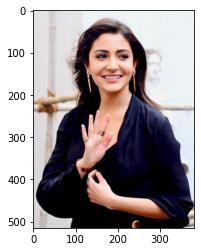

In [102]:
image=cv2.imread("/Anushka.jpg")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [103]:
face_loc=face_recognition.face_locations(image)
numberof_faces=len(face_loc)
print("found {} faces in image".format(numberof_faces))

found 1 faces in image


Aface is located at a pixel location top 80,left 127,bottom 187,right 235


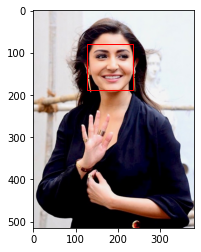

In [104]:
##how to plot rectangle on faces 
plt.imshow(image)
ax=plt.gca()

for face_locn in face_loc:
  top,right,bottom,left=face_locn
  l,t,r,b=left,top,right,bottom  
  print("Aface is located at a pixel location top {},left {},bottom {},right {}".format(t,l,b,r))
  rect=Rectangle((l,t),r-l,b-t,fill=False,color="red")
  ax.add_patch(rect)
plt.show()

##**Face Recognition**

In [79]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [92]:
image=cv2.imread("/angelina-jolie.jpg")
angelina=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/Virat.jpg")
virat=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/shah-rukh-khan.jpg")
shahrukh=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image=cv2.imread("/Anushka.jpg")
anushka=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


In [94]:
angelina_encoding=face_recognition.face_encodings(angelina)[0]
virat_encoding=face_recognition.face_encodings(virat)[0]
shahrukh_encoding=face_recognition.face_encodings(shahrukh)[0]
anushka_encoding=face_recognition.face_encodings(anushka)[0]


known_encoding = [angelina_encoding,virat_encoding,shahrukh_encoding,anushka_encoding]


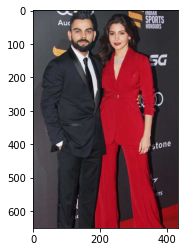

In [107]:
##load unknown image to compare with rest 3
image=cv2.imread("/Virat-anushka.jpg")
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)
unknown_encoding=face_recognition.face_encodings(unknown_image)



In [106]:
from scipy.spatial import distance

for un_encoding in unknown_encoding:
  result=[]
  #result=face_recognition.compare_faces(known_encoding,un_encoding,tolerance=0.6)
  for kn_encoding in known_encoding:
    dis=distance.euclidean(kn_encoding,un_encoding)
    result.append(dis)
  threshold=0.6
  result=np.array(result) <= threshold

  if result[0]:
    print("Angelina Jolie in image \n  June 4, 1975, Los Angeles, California, U.S. \n  daughter of actor Jon Voight,\n  spent much of her childhood in New York before relocating to Los Angeles at age 11.")
  elif result[1]:
    print("Virat kohli in image \n  5 November 1988 \n  an Indian cricketer and the current captain of the India national team\n  Kohli captained India Under-19s to victory at the 2008 Under-19 World Cup in Malaysia.")
  elif result[2]:
    print("Shahrukh Khan in image \n  2 November 1965 New Delhi, India \n  he was named Abdul Rehman by his maternal grandmother \n  but his father changed it to Shah Rukh.")
  elif result[3]:
    print("Anushka Sharma in image\n  1 May 1988 in Ayodhya, Uttar Pradesh\n  Her father, Colonel Ajay Kumar Sharma, is an army officer\n  and her mother, Ashima Sharma, is a homemaker.")
  else : 
    print("Unknown person in image")

Unknown person in image
Unknown person in image
